In [1]:
import yfinance as yf
import pandas as pd

In [ ]:
ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="6mo")  # data for the last year
print("Historical Data:")

historical_data.head(10)

Historical Data:


,Close,High,Low,Open,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-12 00:00:00-04:00,NaN,NaN,NaN,NaN,0,0.25,0.0
2024-08-13 00:00:00-04:00,220.784073,221.402706,218.529026,218.529026,44155300,0.00,0.0
2024-08-14 00:00:00-04:00,221.233093,222.540214,219.217525,220.085625,41960600,0.00,0.0
2024-08-15 00:00:00-04:00,224.226501,224.855123,222.270799,224.106770,46414000,0.00,0.0
2024-08-16 00:00:00-04:00,225.553589,226.331875,223.158850,223.428262,44340200,0.00,0.0
2024-08-19 00:00:00-04:00,225.393936,225.493723,222.550189,225.224311,40687800,0.00,0.0
2024-08-20 00:00:00-04:00,226.012573,226.671128,224.954903,225.274208,30299000,0.00,0.0
2024-08-21 00:00:00-04:00,225.902802,227.479334,224.555775,226.022548,34765500,0.00,0.0
2024-08-22 00:00:00-04:00,224.036926,227.838557,223.408305,227.289762,43695300,0.00,0.0


In [ ]:
print(historical_data.isnull().sum())

Close           1
High            1
Low             1
Open            1
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
print(historical_data.describe())

            Close        High         Low        Open        Volume  \
count  126.000000  126.000000  126.000000  126.000000  1.270000e+02   
mean   231.897385  233.690854  229.559561  231.524317  4.855610e+07   
std      9.678583    9.751358    9.604487    9.664596  2.962573e+07   
min    215.844955  216.423663  213.450217  215.276194  0.000000e+00   
25%    225.398926  226.780716  223.181304  224.668026  3.670165e+07   
50%    228.642754  230.905549  226.995418  228.816402  4.235530e+07   
75%    236.799965  238.460323  233.538934  234.537130  5.209665e+07   
max    258.735504  259.814335  257.347047  257.906429  3.186799e+08   

        Dividends  Stock Splits  
count  127.000000         127.0  
mean     0.005906           0.0  
std      0.038117           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.250000           0.0  


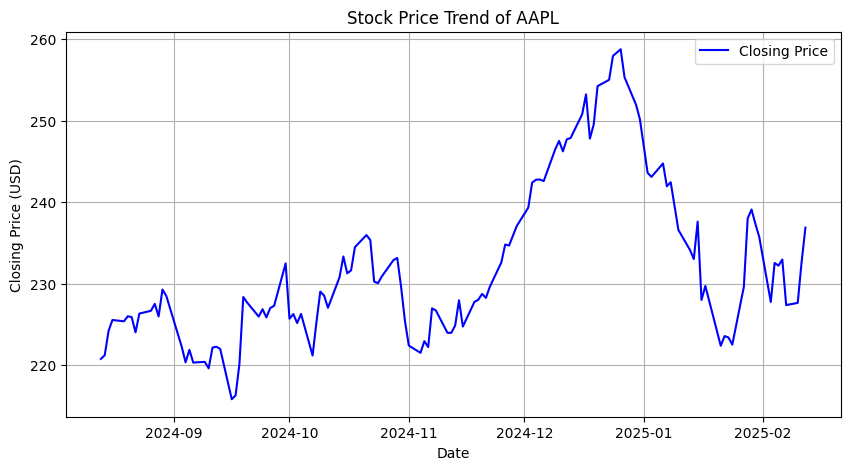

In [ ]:
import matplotlib.pyplot as plt

# Plot Closing Price
plt.figure(figsize=(10, 5))
plt.plot(historical_data.index, historical_data['Close'], label="Closing Price", color='blue')

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Stock Price Trend of AAPL")
plt.legend()
plt.grid()
plt.show()

##Moving Average

In [ ]:
# Calculate the 20-day and 50-day moving averages
historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()

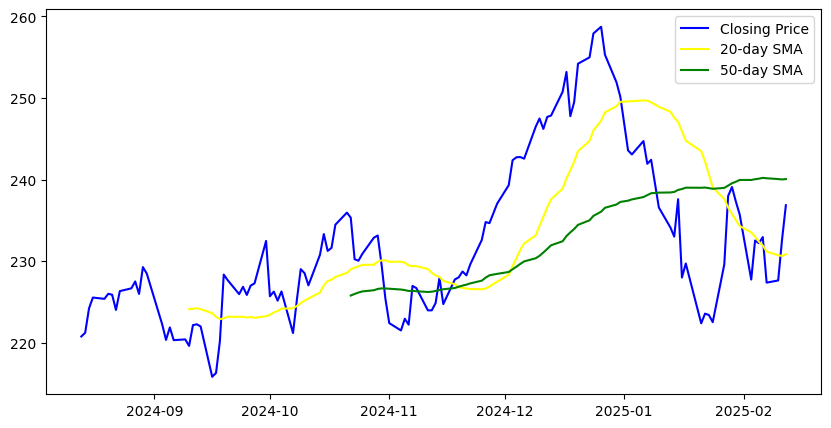

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historical_data.index, historical_data['Close'], label="Closing Price", color="blue")
plt.plot(historical_data.index, historical_data['SMA_20'], label="20-day SMA", color="yellow")
plt.plot(historical_data.index, historical_data['SMA_50'], label="50-day SMA", color="green")
plt.legend()
plt.show()


In [ ]:
historical_data['Buy_Signal'] = (historical_data['SMA_20']>historical_data['SMA_50']) & (historical_data['SMA_50'].shift(1)>=historical_data['SMA_20'].shift(1))
historical_data['Sell_Signal'] = (historical_data['SMA_20']<historical_data['SMA_50']) & (historical_data['SMA_20'].shift(1)>=historical_data['SMA_50'].shift(1))

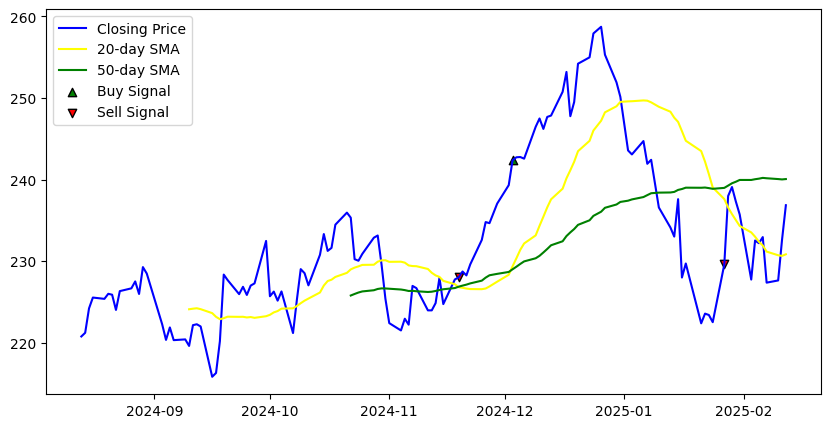

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(historical_data.index, historical_data['Close'], label="Closing Price", color="blue")

plt.plot(historical_data.index, historical_data['SMA_20'], label="20-day SMA", color="yellow")
plt.plot(historical_data.index, historical_data['SMA_50'], label="50-day SMA", color="green")

plt.scatter(historical_data.index[historical_data['Buy_Signal']], historical_data['Close'][historical_data['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1, edgecolors='black')
plt.scatter(historical_data.index[historical_data['Sell_Signal']], historical_data['Close'][historical_data['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1, edgecolors='black')

plt.legend()
plt.show()

In [ ]:
# Extract buy and sell prices
buy_prices = historical_data.loc[historical_data['Buy_Signal'], 'Close']
sell_prices = historical_data.loc[historical_data['Sell_Signal'], 'Close']

# Ensure equal number of buy/sell pairs (we can't sell before buying)
if sell_prices.index[0] < buy_prices.index[0]:
    sell_prices = sell_prices.iloc[1:]  # Remove the first sell signal

# Align the buy/sell pairs
min_len = min(len(buy_prices), len(sell_prices))
buy_prices, sell_prices = buy_prices.iloc[:min_len], sell_prices.iloc[:min_len]

# Calculate profit per trade
profits = sell_prices.values - buy_prices.values
total_profit = profits.sum()

# Print results
print(f"Total Trades Executed: {len(profits)}")
print(f"Total Profit/Loss: ${total_profit:.2f}")
print(f"Average Profit per Trade: ${profits.mean():.2f}")
print(f"Winning Trades: {sum(profits > 0)} / {len(profits)}")

Total Trades Executed: 1
Total Profit/Loss: $-12.78
Average Profit per Trade: $-12.78
Winning Trades: 0 / 1


#Different SMA (3,9)

In [21]:
ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
df = ticker.history(period="1y")  # data for 6 months

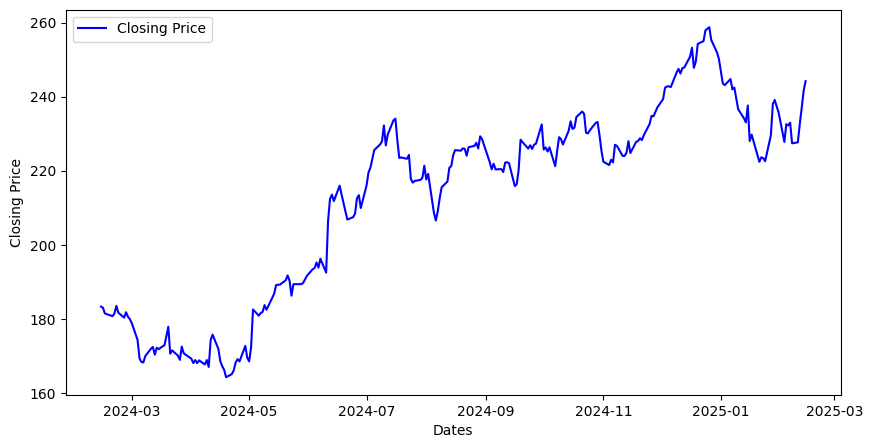

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label="Closing Price", color="blue")

plt.xlabel("Dates")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [23]:
#historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()
df['SMA_3'] = df['Close'].rolling(window=3).mean()
df['SMA_9'] = df['Close'].rolling(window=9).mean()

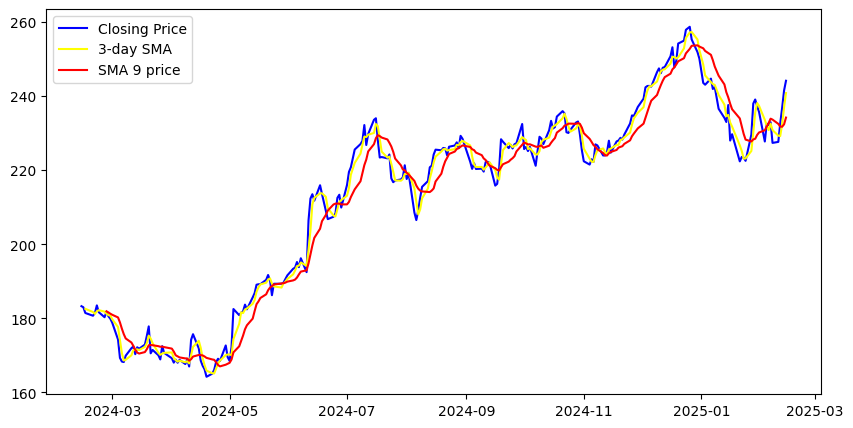

In [24]:
plt.figure(figsize=(10,5))

plt.plot(df.index, df['Close'], label="Closing Price", color="blue")
plt.plot(df.index, df['SMA_3'], label="3-day SMA", color="yellow")
plt.plot(df.index, df['SMA_9'], label="SMA 9 price", color="red")

plt.legend()
plt.show()

In [25]:
df['Buy_Signal'] = (df['SMA_3']>df['SMA_9']) & (df['SMA_9'].shift(1)>=df['SMA_3'].shift(1))
df['Sell_Signal'] = (df['SMA_3']<df['SMA_9']) & (df['SMA_3'].shift(1)>=df['SMA_9'].shift(1))

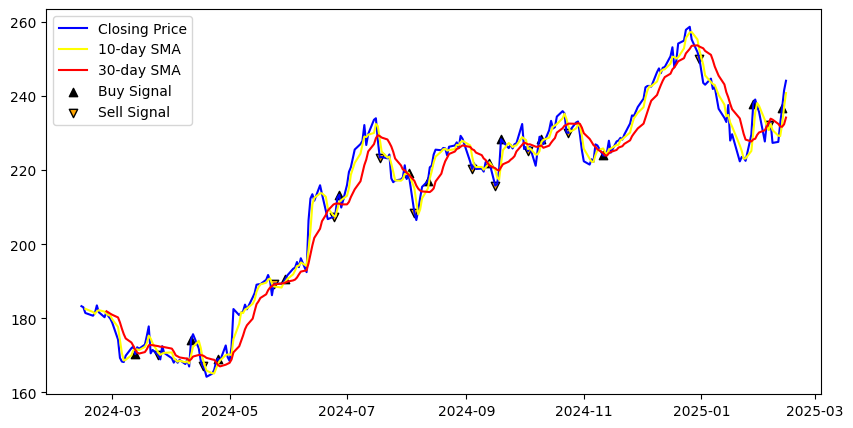

In [26]:
plt.figure(figsize=(10,5))

plt.plot(df.index, df['Close'], label="Closing Price", color="blue")
plt.plot(df.index, df['SMA_3'], label="10-day SMA", color="yellow")
plt.plot(df.index, df['SMA_9'], label="30-day SMA", color="red")

plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], marker='^', color='black', label='Buy Signal', alpha=1, edgecolors='black')
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], marker='v', color='orange', label='Sell Signal', alpha=1, edgecolors='black')

plt.legend()
plt.show()

In [27]:
buy_prices = df.loc[df['Buy_Signal'], 'Close']
sell_prices = df.loc[df['Sell_Signal'], 'Close']

# Ensure equal number of buy/sell pairs (we can't sell before buying)
if sell_prices.index[0] < buy_prices.index[0]:
    sell_prices = sell_prices.iloc[1:]  # Remove the first sell signal

# Align the buy/sell pairs
min_len = min(len(buy_prices), len(sell_prices))
buy_prices, sell_prices = buy_prices.iloc[:min_len], sell_prices.iloc[:min_len]

# Calculate profit per trade
profits = sell_prices.values - buy_prices.values
total_profit = profits.sum()

# Print results
print(f"Total Trades Executed: {len(profits)}")
print(f"Total Profit/Loss: ${total_profit:.2f}")
print(f"Average Profit per Trade: ${profits.mean():.2f}")
print(f"Winning Trades: {sum(profits > 0)} / {len(profits)}")

Total Trades Executed: 12
Total Profit/Loss: $45.11
Average Profit per Trade: $3.76
Winning Trades: 6 / 12


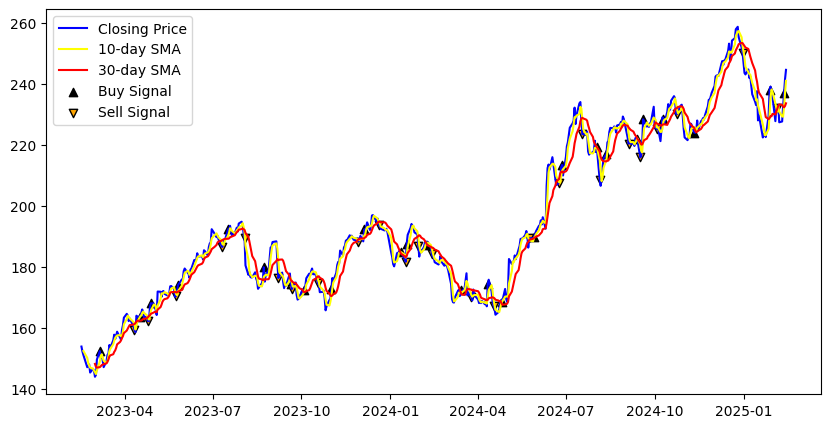

Total Trades Executed: 25
Total Profit/Loss: $69.59
Average Profit per Trade: $2.78
Winning Trades: 12 / 25


In [14]:
import matplotlib.pyplot as plt
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
df = ticker.history(period="2y")  # data for 1 year

df['SMA_Low'] = df['Close'].rolling(window=3).mean()
df['SMA_High'] = df['Close'].rolling(window=10).mean()

# Add RSI to DataFrame
df['RSI'] = calculate_rsi(df['Close'])

#df['Buy_Signal'] = (df['SMA_Low']>df['SMA_High']) & (df['SMA_High'].shift(1)>=df['SMA_Low'].shift(1))
#df['Buy_Signal'] = (df['SMA_Low'] > df['SMA_High']) & (df['SMA_Low'].shift(1) <= df['SMA_High'].shift(1)) & (df['RSI'] < 70)
df['Buy_Signal'] = (df['SMA_Low'] > df['SMA_High']) & (df['SMA_Low'].shift(1) <= df['SMA_High'].shift(1))
df['Sell_Signal'] = (df['SMA_Low']<df['SMA_High']) & (df['SMA_Low'].shift(1)>=df['SMA_High'].shift(1))

plt.figure(figsize=(10,5))

plt.plot(df.index, df['Close'], label="Closing Price", color="blue")
plt.plot(df.index, df['SMA_Low'], label="10-day SMA", color="yellow")
plt.plot(df.index, df['SMA_High'], label="30-day SMA", color="red")

plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], marker='^', color='black', label='Buy Signal', alpha=1, edgecolors='black')
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], marker='v', color='orange', label='Sell Signal', alpha=1, edgecolors='black')

plt.legend()
plt.show()

buy_prices = df.loc[df['Buy_Signal'], 'Close']
sell_prices = df.loc[df['Sell_Signal'], 'Close']

# Ensure equal number of buy/sell pairs (we can't sell before buying)
if sell_prices.index[0] < buy_prices.index[0]:
    sell_prices = sell_prices.iloc[1:]  # Remove the first sell signal

# Align the buy/sell pairs
min_len = min(len(buy_prices), len(sell_prices))
buy_prices, sell_prices = buy_prices.iloc[:min_len], sell_prices.iloc[:min_len]

# Calculate profit per trade
profits = sell_prices.values - buy_prices.values
total_profit = profits.sum()

# Print results
print(f"Total Trades Executed: {len(profits)}")
print(f"Total Profit/Loss: ${total_profit:.2f}")
print(f"Average Profit per Trade: ${profits.mean():.2f}")
print(f"Winning Trades: {sum(profits > 0)} / {len(profits)}")

In [33]:
print(f"Min RSI: {df['RSI'].min()}, Max RSI: {df['RSI'].max()}")


Min RSI: 16.748021161895565, Max RSI: 96.16301384137128


In [4]:
df['Crossover'] = (df['SMA_Low'] > df['SMA_High']) & (df['SMA_Low'].shift(1) <= df['SMA_High'].shift(1))
print(df[df['Crossover']])  # Show SMA crossover points


                                 Open        High         Low       Close  \
Date                                                                        
2024-04-15 00:00:00-04:00  174.535868  175.799904  171.689308  171.878418   
2024-04-29 00:00:00-04:00  172.555207  175.202709  172.286487  172.684601   
2024-08-15 00:00:00-04:00  224.106770  224.855123  222.270799  224.226501   
2024-09-23 00:00:00-04:00  226.840741  228.946108  225.314102  225.972656   
2024-11-20 00:00:00-05:00  227.809519  229.677461  225.641904  228.748489   
2025-01-31 00:00:00-05:00  246.918527  246.918527  233.183628  235.740814   
2025-02-12 00:00:00-05:00  231.199997  236.960007  230.679993  236.869995   

                              Volume  Dividends  Stock Splits     SMA_Low  \
Date                                                                        
2024-04-15 00:00:00-04:00   73531800        0.0           0.0  171.536032   
2024-04-29 00:00:00-04:00   68169400        0.0           0.0  168.924362  

In [19]:
stocks = ["AAPL", "TSLA", "MSFT", "AMZN"]
results = {}

for ticker_symbol in stocks:
    ticker = yf.Ticker(ticker_symbol)
    df = ticker.history(period="1y")

    # Calculate moving averages
    df['SMA_Low'] = df['Close'].rolling(window=3).mean()
    df['SMA_High'] = df['Close'].rolling(window=10).mean()

    # Generate buy/sell signals
    df['Buy_Signal'] = (df['SMA_Low'] > df['SMA_High']) & (df['SMA_Low'].shift(1) <= df['SMA_High'].shift(1))
    df['Sell_Signal'] = (df['SMA_Low'] < df['SMA_High']) & (df['SMA_Low'].shift(1) >= df['SMA_High'].shift(1))

    # Calculate profits
    buy_prices = df.loc[df['Buy_Signal'], 'Close']
    sell_prices = df.loc[df['Sell_Signal'], 'Close']

    # Ensure equal number of buy/sell pairs
    if sell_prices.index[0] < buy_prices.index[0]:
        sell_prices = sell_prices.iloc[1:]

    min_len = min(len(buy_prices), len(sell_prices))
    profits = sell_prices.iloc[:min_len].values - buy_prices.iloc[:min_len].values
    total_profit = profits.sum()

    results[ticker_symbol] = total_profit

    df['Daily_Return'] = df['Close'].pct_change()

    # Sharpe Ratio (assumes risk-free rate = 0%)
    sharpe_ratio = df['Daily_Return'].mean() / df['Daily_Return'].std() * np.sqrt(252)

    # CAGR (Annualized Return)
    start_price = df['Close'].iloc[0]
    end_price = df['Close'].iloc[-1]
    num_years = len(df) / 252  # Assuming 252 trading days in a year
    cagr = (end_price / start_price) ** (1 / num_years) - 0.01

    # Max Drawdown
    df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
    df['Cumulative_Max'] = df['Cumulative_Return'].cummax()
    df['Drawdown'] = df['Cumulative_Return'] / df['Cumulative_Max'] - 1
    max_drawdown = df['Drawdown'].min()

    # Print results
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"CAGR: {cagr:.2%}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

# Print results for all stocks
for stock, profit in results.items():
    print(f"{stock}: Total Profit = ${profit:.2f}")


Sharpe Ratio: 1.34
CAGR: 132.82%
Max Drawdown: -14.05%
Sharpe Ratio: 1.21
CAGR: 176.93%
Max Drawdown: -31.54%
Sharpe Ratio: 0.15
CAGR: nan%
Max Drawdown: -15.49%
Sharpe Ratio: 1.24
CAGR: 133.84%
Max Drawdown: -19.49%
AAPL: Total Profit = $44.83
TSLA: Total Profit = $141.10
MSFT: Total Profit = $16.06
AMZN: Total Profit = $33.15


In [16]:
capital_per_trade = 1000
profits = (sell_prices.values - buy_prices.values) / buy_prices.values * capital_per_trade
total_profit = profits.sum()

print(f"Total Profit with Fixed Investment: ${total_profit:.2f}")


Total Profit with Fixed Investment: $181.67


In [17]:
import numpy as np

# Compute daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Sharpe Ratio (assumes risk-free rate = 0%)
sharpe_ratio = df['Daily_Return'].mean() / df['Daily_Return'].std() * np.sqrt(252)

# CAGR (Annualized Return)
start_price = df['Close'].iloc[0]
end_price = df['Close'].iloc[-1]
num_years = len(df) / 252  # Assuming 252 trading days in a year
cagr = (end_price / start_price) ** (1 / num_years) - 0.01

# Max Drawdown
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
df['Cumulative_Max'] = df['Cumulative_Return'].cummax()
df['Drawdown'] = df['Cumulative_Return'] / df['Cumulative_Max'] - 1
max_drawdown = df['Drawdown'].min()

# Print results
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")


Sharpe Ratio: 1.24
CAGR: 133.84%
Max Drawdown: -19.49%


In [18]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_Low,SMA_High,Buy_Signal,Sell_Signal,Daily_Return,Cumulative_Return,Cumulative_Max,Drawdown
Date,,,,,,,,,,,,,,,
2024-02-15 00:00:00-05:00,170.580002,171.169998,167.589996,169.800003,49855200,0.0,0.0,NaN,NaN,False,False,NaN,NaN,NaN,NaN
2024-02-16 00:00:00-05:00,168.740005,170.419998,167.169998,169.509995,48074600,0.0,0.0,NaN,NaN,False,False,-0.001708,0.998292,0.998292,0.000000
2024-02-20 00:00:00-05:00,167.830002,168.710007,165.740005,167.080002,41980300,0.0,0.0,168.796666,NaN,False,False,-0.014335,0.983981,0.998292,-0.014335
2024-02-21 00:00:00-05:00,168.940002,170.229996,167.139999,168.589996,44575600,0.0,0.0,168.393331,NaN,False,False,0.009038,0.992874,0.998292,-0.005427
2024-02-22 00:00:00-05:00,173.100006,174.800003,171.770004,174.580002,55392400,0.0,0.0,170.083333,NaN,False,False,0.035530,1.028151,1.028151,0.000000
